In [73]:
# !pip install vaderSentiment
# !pip install spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import pickle
import numpy as np
from nltk import word_tokenize, FreqDist
import string
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer as sa
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy

def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return (stopwords_removed)

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...','.' ,'``','1','2','3','4','5','6'
                   ,'7','8','9',"'s","'",'’',"n't","'ve","'m"]

sp = spacy.load('en')

In [6]:
with open('userratingsDF.pickle', 'rb') as f:
    dfr = pickle.load(f)

In [8]:
corpus1=dfr['content']
corpus=nltk.Text(dfr['content'])

In [9]:
with open('CategoricalItemDF.pickle', 'rb') as f:
    full = pickle.load(f)

In [10]:
full.sort_values('url',inplace=True)

# Tokenizing and Removing Stop Words & Lemmatizing

In [11]:
#processed_data is a list of lists. each smaller list represents a tokenized
#review where stop words have been removed
processed_data = list(map(process_article, corpus))

In [9]:
#How many unique words do we have?
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

5869

In [10]:
#articles_contact is one list containing all words in the tokenized 
#corpus with stopwords removed, can be repeated, not all words unique
articles_concat = []
for article in processed_data:
    articles_concat += article

In [80]:
processed_data

[['product',
  'changed',
  'problematic',
  'skin',
  'read',
  'reviews',
  'like',
  'sure',
  'would',
  'work',
  'congestion',
  'cheeks',
  'years',
  'aha',
  'work',
  'peels',
  'lasers',
  'thought',
  'allergic',
  'salicylic',
  'acid',
  'realized',
  'sensitive',
  'high',
  'concentrations',
  'wrong',
  'formula',
  'product',
  'clearing',
  'skin',
  'saw',
  'esthetician',
  'last',
  'week',
  'noted',
  'skin',
  'getting',
  'better',
  'like',
  'dab',
  'product',
  'need',
  'dry',
  'skin',
  'fan',
  'life'],
 ['absolutely',
  'love',
  'product',
  'one',
  'bought',
  'tried',
  'everything',
  'toners',
  'actually',
  'makes',
  'pores',
  'disappear',
  'always',
  'harder',
  'little',
  'bumps',
  'chin',
  'assumed',
  'forever',
  'gone',
  'amazed',
  'worth'],
 ['really',
  'hoping',
  'would',
  'work',
  'since',
  'trying',
  'countless',
  'acne',
  'products',
  'wow',
  'best',
  'salicylic',
  'acid',
  'product',
  'ever',
  'used',
  'bur

In [85]:
lemcontent=[]
for review in processed_data:
    words=[]
    sentence=sp(' '.join(review))
    for word in sentence:
        words.append(word.lemma_)
    lemcontent.append(words)

In [92]:
len(lemcontent)

3258

In [90]:
len(dfr)

1669

In [87]:
full['newcontent']=lemcontent

ValueError: Length of values does not match length of index

In [ ]:
lemwords=[]
words=' '.join(articles_concat)
words=sp(words)
for word in words:
    lemwords.append(word.lemma_)

In [11]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(200)

[('skin', 4033),
 ('product', 2449),
 ('use', 1462),
 ('using', 1294),
 ('products', 919),
 ('face', 870),
 ('love', 858),
 ('used', 774),
 ('like', 732),
 ('really', 712),
 ('great', 590),
 ('one', 553),
 ('cream', 540),
 ('good', 520),
 ('also', 494),
 ('get', 474),
 ('serum', 455),
 ('dry', 444),
 ('moisturizer', 416),
 ('night', 412),
 ('day', 411),
 ('years', 402),
 ('tried', 389),
 ('would', 384),
 ('every', 383),
 ('well', 381),
 ('much', 377),
 ('time', 359),
 ('best', 358),
 ('feel', 354),
 ('little', 353),
 ('works', 353),
 ('results', 350),
 ('even', 341),
 ('sensitive', 332),
 ('acne', 316),
 ('better', 301),
 ('try', 293),
 ('recommend', 289),
 ('feels', 286),
 ('without', 285),
 ('weeks', 282),
 ('week', 279),
 ('oily', 279),
 ('amazing', 277),
 ('first', 277),
 ('price', 274),
 ('morning', 273),
 ('difference', 271),
 ('looks', 265),
 ('smooth', 265),
 ('eye', 259),
 ('makes', 251),
 ('always', 251),
 ('lines', 251),
 ('since', 247),
 ('see', 247),
 ('long', 245),
 ('def

In [35]:
new=[]
for p,u,t in zip(processed_data,dfr.url,dfr.title):
    new.append({'url':u,'content':' '.join(p),'title':t})

In [36]:
analyzer = SentimentIntensityAnalyzer()

In [37]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))
    return score['pos']

In [38]:
sentiments=[]
for n in new:
    sentiments.append({'url':n['url'],'tsentiment':sentiment_analyzer_scores(n['title']),'csentiment':sentiment_analyzer_scores(n['content'])})
sentimentsdf=pd.DataFrame(sentiments)
    

In [39]:
sentimentsdf.sort_values('url',inplace=True)

In [40]:
sentimentsdf.head()

,csentiment,tsentiment,url
1585,0.222,0.000,10236357
1588,0.276,0.677,10236357
1587,0.172,0.800,10236357
1586,0.157,0.388,10236357
1584,0.000,0.672,10236357


In [41]:
avg_sent_by_url=sentimentsdf.groupby('url').mean()

In [42]:
avg_sent_by_url.head()

,csentiment,tsentiment
url,,
10236357,0.1654,0.50740
10305907,0.2875,0.75300
10305956,0.1890,0.37800
10306437,0.2290,0.23675
10306558,0.3385,0.31820


In [43]:
len(avg_sent_by_url)

514

In [44]:
dfr.sort_values('url',inplace=True)

In [45]:
dfrsentc,dfrsentt=[],[]
for (au,c,t) in zip(avg_sent_by_url.index,avg_sent_by_url['csentiment'],avg_sent_by_url['tsentiment']):
    for u in dfr.url:
        if u==au:
            dfrsentc.append(c)
            dfrsentt.append(t)

In [46]:
df1=dfr

In [47]:
# df1['sentiment']=sentimentsdf['sentiment']
df1['title_sentiment']=sentimentsdf['tsentiment']
df1['content_sentiment']=sentimentsdf['csentiment']
df1['avg_title_sentiment']=dfrsentt
df1['avg_content_sentiment']=dfrsentc

In [48]:
df1

,content,date,rating,title,url,user,title_sentiment,content_sentiment,avg_title_sentiment,avg_content_sentiment
1585,i have used this product for 4 years. easy to ...,2012-01-30,5,Years,10236357,kimber,0.000,0.222,0.50740,0.1654
1588,"the best eye creme ever tried, it delivers res...",2005-09-22,5,simply the best,10236357,george,0.677,0.276,0.50740,0.1654
1587,the cream was easy to use and did not feel gre...,2007-12-19,5,Great Results. Loved It.,10236357,mike,0.800,0.172,0.50740,0.1654
1586,"i didn't have any wrinkles around my eyes, but...",2010-02-05,5,It's worth the money,10236357,adrian,0.388,0.157,0.50740,0.1654
1584,it keeps your eye area moisturizer without bei...,2014-04-21,5,Great eye product,10236357,westtexas,0.672,0.000,0.50740,0.1654
2753,i am surprised that jurlique did not name this...,2012-09-27,5,Comforting,10305907,marvymds,1.000,0.292,0.75300,0.2875
2752,it seems like such a small tube but fortunatel...,2014-03-10,4,Mattifying; Great for combination skin,10305907,trixie,0.506,0.283,0.75300,0.2875
2167,this is the best toner i have ever used! it is...,2006-08-04,5,Love it!,10305956,sandi,0.818,0.413,0.37800,0.1890
2166,"this was my first purchse with skinstore, and ...",2008-01-01,5,"Bright, Beautiful and Bearly there",10305956,"cara bryant, newman, western australia",0.694,0.255,0.37800,0.1890
2165,just read alcohol is a terrible ingrediant for...,2008-03-01,1,Alcohol?!,10305956,confused,0.000,0.000,0.37800,0.1890


In [49]:
with open('RATINGDF.pickle', 'wb') as f:
    pickle.dump(df1, f, pickle.HIGHEST_PROTOCOL)

In [50]:
# df1.reset_index(inplace=True)
# df1.drop(columns='index',inplace=True)
# df1.drop_duplicates(subset=['url','user','rating'],inplace=True)

In [51]:
df1

,content,date,rating,title,url,user,title_sentiment,content_sentiment,avg_title_sentiment,avg_content_sentiment
0,i have used this product for 4 years. easy to ...,2012-01-30,5,Years,10236357,kimber,0.000,0.222,0.507400,0.165400
1,"the best eye creme ever tried, it delivers res...",2005-09-22,5,simply the best,10236357,george,0.677,0.276,0.507400,0.165400
2,the cream was easy to use and did not feel gre...,2007-12-19,5,Great Results. Loved It.,10236357,mike,0.800,0.172,0.507400,0.165400
3,"i didn't have any wrinkles around my eyes, but...",2010-02-05,5,It's worth the money,10236357,adrian,0.388,0.157,0.507400,0.165400
4,it keeps your eye area moisturizer without bei...,2014-04-21,5,Great eye product,10236357,westtexas,0.672,0.000,0.507400,0.165400
5,i am surprised that jurlique did not name this...,2012-09-27,5,Comforting,10305907,marvymds,1.000,0.292,0.753000,0.287500
6,it seems like such a small tube but fortunatel...,2014-03-10,4,Mattifying; Great for combination skin,10305907,trixie,0.506,0.283,0.753000,0.287500
7,this is the best toner i have ever used! it is...,2006-08-04,5,Love it!,10305956,sandi,0.818,0.413,0.378000,0.189000
8,"this was my first purchse with skinstore, and ...",2008-01-01,5,"Bright, Beautiful and Bearly there",10305956,"cara bryant, newman, western australia",0.694,0.255,0.378000,0.189000
9,just read alcohol is a terrible ingrediant for...,2008-03-01,1,Alcohol?!,10305956,confused,0.000,0.000,0.378000,0.189000


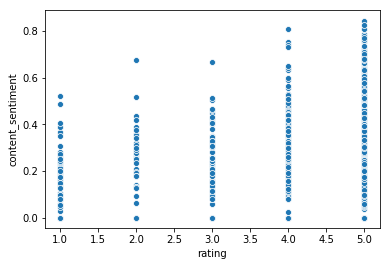

In [52]:
import seaborn as sns
sns.scatterplot(x='rating',y='content_sentiment',data=df1)

# Trying TFIDF: not sure why we would need this

In [160]:
# tfidf = vectorizer.fit_transform(corpus)

In [162]:
# tfidf.shape

(3258, 5274)

In [164]:
# non_zero_cols = tfidf.nnz / float(tfidf.shape[0])
# print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

# percent_sparse = 1 - (non_zero_cols / float(tfidf.shape[1]))
# print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 42.258747697974215
Percentage of columns containing 0: 0.9919873440087269


# Some NLTK EDA

In [53]:
tokens=[]
for r in dfr.content:
    tokens.append(nltk.word_tokenize(r.lower()))

In [54]:
alltokensr=[]
for t in tokens:
    string=[]
    for word in t:
        if word not in stopwords_list:
            string.append(word)
    alltokensr.append(string)

In [55]:
dfr['tokens']=alltokensr

In [56]:
allvocab=set()
for comment in alltokensr:
    allvocab.update(comment)
len(allvocab)

5857

In [57]:
articles_concat = []
for article in alltokensr:
    articles_concat += article

In [58]:
from wordcloud import WordCloud

In [59]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## Whole Corpus Word Cloud

In [60]:
wordcloud = WordCloud().generate(str(corpus[7:]))

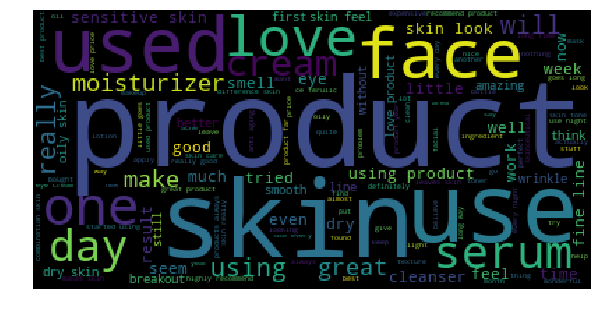

In [61]:
plot_wordcloud(wordcloud)

## Processed Corpus Word Cloud 

In [74]:
lemwords=[]
words=' '.join(articles_concat)
words=sp(words)
for word in words:
    lemwords.append(word.lemma_)

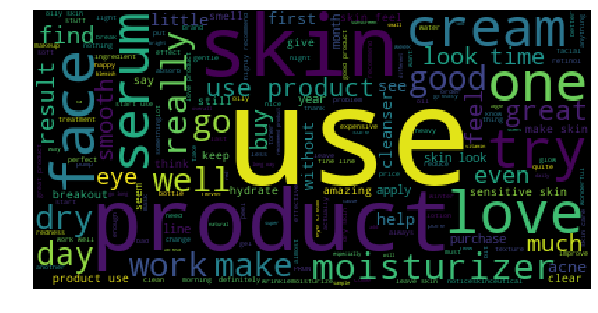

In [75]:
al=' '.join(lemwords)
wordcloud = WordCloud().generate(al)
plot_wordcloud(wordcloud)